In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

Question 1: Consider the function $$f(x)=\sqrt{x\sin x}$$

(a) Make a graph of the function on the interval $-3<x<3$ $\\$
(b) Find $f'(x)$ analytically and make a graph of $f'(x)'$ on the interval $-3<x<3$ $\\$
(c) Approximate the derivative of the function at $x=-3$ using the central difference. Choose the maximum value of $h$ such that the result for the derivative for the derivative has an approximation error (calculated as the difference from the true value of the derivative) of no greater than $10^{-5}$. (You can find this value of $h$ by guessing and checking, or doing a more formal calulation based on the error formula.) For your final answer, print out the derivative, the value of $h$, and the approximation error.

In [2]:
def f(x):
    return math.sqrt(x*math.sin(x))

def fp(x):
    return (math.sin(x) + x*math.cos(x))/(2*math.sqrt(x*math.sin(x)))

def central_difference(f, x, h):
    return (f(x + h/2) - f(x - h/2))/h

def error(x, h, f, fp):
    return abs(fp(x) - central_difference(f=f, x=x, h=h))


Central Difference Result: 2.173842857486215
True Value: 2.1738328576800523
Approximate Error: 9.999806162674929e-06
Value of h: 0.0016389235105695777


C:\Users\ngaco\AppData\Local\Temp\ipykernel_19888\2830637998.py:37: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


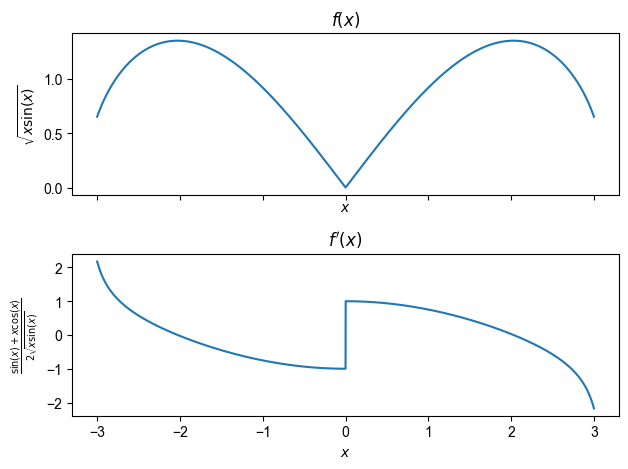

In [3]:
N = 10000
INTERVAL = [-3, 3]
h = 0.1
X = np.linspace(-3, 3, N)
Y  = [f(x) for x in X]
Yp = [fp(x) for x in X]

epsilon = error(x=-3, h=h, f=f, fp=fp)

while epsilon > 1e-5:
    h *= 0.99999
    epsilon = error(x=-3, h=h, f=f, fp=fp)

approx_fp = central_difference(f=f, x=-3, h=h)
actual_fp = fp(x=-3)

print(f'''
Central Difference Result: {approx_fp}
True Value: {actual_fp}
Approximate Error: {epsilon}
Value of h: {h}''')


fig, (F, Fp) = plt.subplots(nrows = 2, ncols = 1, sharex = True)

F.set_title(r'$f(x)$')
F.set_xlabel(r'$x$')
F.set_ylabel(r'$\sqrt{x\sin (x)}$')
F.plot(X, Y)


Fp.plot(X, Yp)
Fp.set_title(r"$f'(x)$")
Fp.set_xlabel(r'$x$')
Fp.set_ylabel(r'$\frac{\sin (x) + x\cos (x)}{2\sqrt{x\sin (x)}}$')

plt.style.use('seaborn')
plt.tight_layout()
plt.savefig('HW3_Q1.png')

plt.show()

Question 2: A simple model for population growth (for example, a population of animals in some habitat) can be described by $$\frac{dN}{dt} = aN - bN^2$$
where $N$ is the number of individuals in a population. The first term $aN$ corresponds to the birth of new members. The second term $-bN^2$ corresponds to deaths and is proportional to $N^2$ to account for the fact that food becomes more scarce when $N$ gets large. Let's assumer $N(0) = 2$, with $a=5\text{yrs}^{-1}$ and $b=0.05\text{yrs}^{-2}$. $\\$

(a) Find $N(t)$ up to $t=5$ yrs using Euler's method with $25$ steps. $\\$
(b) Find $N(t)$ up to $t=5$ yrs using the fourth-order Runge-Kutta method with $25$ steps. $\\$
(c) Make a plot comparing the two solutions.

C:\Users\ngaco\AppData\Local\Temp\ipykernel_19888\2638975128.py:40: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


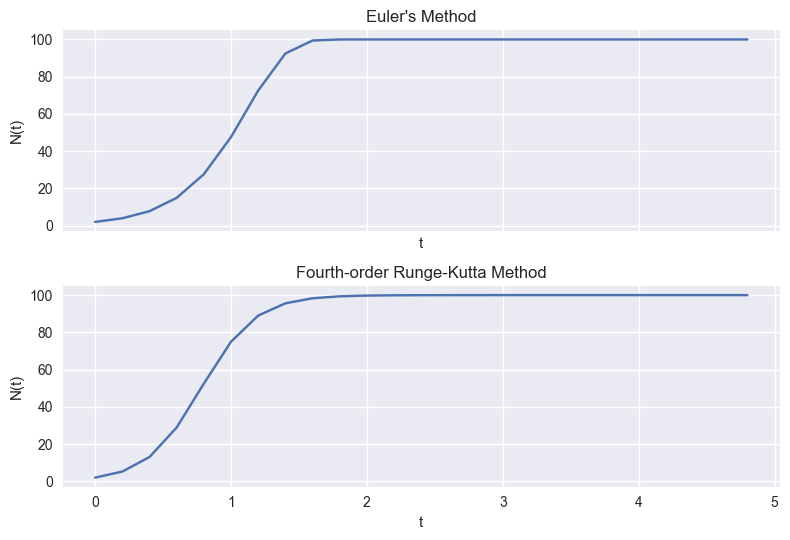

In [4]:
a = 5.0
b = 0.05

def f(x, t):
    return a*x - b*x**2

t0, tf = 0, 5
N = 25
h = (tf - t0)/N
x_euler, x_rk4 = 2.0, 2.0

T = np.arange(t0, tf, h)
X_EULER = []
X_RK4 = []

for t in T:
    X_EULER.append(x_euler)
    x_euler += h*f(x_euler,t)

    X_RK4.append(x_rk4)
    k1 = h*f(x_rk4,t)
    k2 = h*f(x_rk4 + 0.5*k1, t + 0.5*h)
    k3 = h*f(x_rk4 + 0.5*k2, t + 0.5*h)
    k4 = h*f(x_rk4 + k3, t + h)
    x_rk4 += (k1 + 2*k2 + 2*k3 + k4)/6


fig, (EULER, RK4) = plt.subplots(nrows = 2, ncols = 1, sharex = True)

EULER.set_title("Euler's Method")
EULER.set_xlabel('t')
EULER.set_ylabel('N(t)')
EULER.plot(T, X_EULER)

RK4.set_title("Fourth-order Runge-Kutta Method")
RK4.set_xlabel('t')
RK4.set_ylabel('N(t)')
RK4.plot(T, X_RK4)

plt.style.use('seaborn')
plt.tight_layout()
plt.savefig('HW3_Q2 Euler vs RK4 Method.png')

plt.show()